# Toy Regression Example

In [36]:
import torch
import torch.distributions as D
import torch.nn as nn
from torch.nn import functional as F

In [37]:
# create toy dataset
torch.manual_seed(0)
x = D.Uniform(low = -4., high=4.).sample((20,))
y = D.Independent(D.Normal(loc=x**3, scale=3), 1).sample()

In [38]:
import matplotlib.pyplot as plt

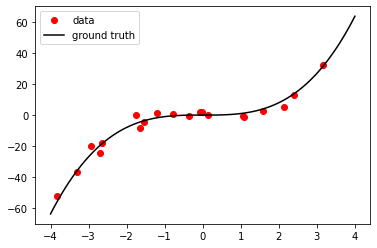

In [39]:
xs = torch.linspace(-4, 4, 100)
plt.plot(x, y, 'ro', label='data')
plt.plot(xs, xs**3, 'k-', label='ground truth')
plt.legend()

In [173]:
class model(nn.Module):
    def __init__(self, input_size, num_hidden_layers, num_hidden_nodes, output_size):
        super(model, self).__init__()
        self.input_size = input_size
        self.input_layer = nn.Linear(input_size, num_hidden_nodes)
        self.hidden_layers = nn.ModuleList(
            [nn.Linear(num_hidden_nodes, num_hidden_nodes) for i in range(num_hidden_layers)])
        self.final_layer = nn.Linear(num_hidden_nodes, output_size)

    def forward(self, x):
        x = F.relu(self.input_layer(x.view(-1,1)))
        
        for f in self.hidden_layers:
            x = F.relu(f(x))
        
        x = self.final_layer(x)

        return x

In [174]:
def loss_function(y, y_preds):
    return ((y.view(-1,1) - y_preds) ** 2).sum(-1).mean()

In [186]:
my_model = model(1, 1, 100, 1)
# use weight decay for l2 regularisation
optimiser = torch.optim.Adam(my_model.parameters(), lr=1e-1, weight_decay=0.5)

for epoch in range(1, 1 + 40):
    optimiser.zero_grad()
    y_preds = my_model(x)
    loss = loss_function(y, y_preds)
    if epoch % 1000 == 0:
        print(f'The loss at epoch {epoch} is: {loss.item():.5f}')
    loss.backward()
    optimiser.step()
    

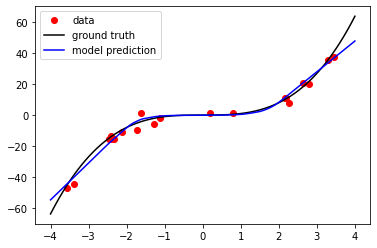

In [187]:
xs = torch.linspace(-4, 4, 100)
plt.plot(x, y, 'ro', label='data')
plt.plot(xs, xs**3, 'k-', label='ground truth')
plt.plot(xs, my_model(xs).detach(), 'b-', label='model prediction')
plt.legend()

In [188]:
for w in my_model.parameters():
    print(w)

Parameter containing:
tensor([[ 0.3537],
        [-0.3728],
        [-0.7239],
        [ 0.0107],
        [ 0.1380],
        [-0.4305],
        [-0.2075],
        [-0.5658],
        [ 0.4211],
        [-0.1779],
        [-0.2979],
        [-0.5127],
        [ 0.5286],
        [ 0.0720],
        [-0.1725],
        [-0.2469],
        [ 0.5593],
        [-0.0457],
        [-0.1661],
        [ 0.5266],
        [ 0.0523],
        [ 0.4119],
        [-0.1872],
        [ 0.0488],
        [ 0.1904],
        [-0.4626],
        [-0.6006],
        [-0.3067],
        [ 0.2066],
        [-0.5256],
        [-0.0149],
        [-0.0492],
        [-0.0767],
        [ 0.2998],
        [-0.2366],
        [-0.5459],
        [-0.0050],
        [ 0.2386],
        [-0.3927],
        [ 0.0301],
        [ 0.2660],
        [ 0.2350],
        [ 0.1058],
        [ 0.1764],
        [-0.7395],
        [-0.6418],
        [-0.4526],
        [ 0.4556],
        [-0.4198],
        [-0.0679],
        [ 0.2106],
        [

In [189]:
my_model.hidden_layers[0].weight

Parameter containing:
tensor([[-0.0314, -0.1715,  0.0470,  ..., -0.0712, -0.2284, -0.0643],
        [ 0.0422, -0.2164,  0.0668,  ..., -0.0076,  0.1351,  0.0390],
        [-0.0173,  0.1659,  0.2437,  ...,  0.0456,  0.1428,  0.0425],
        ...,
        [-0.0562, -0.0400,  0.0349,  ..., -0.1042, -0.0171, -0.1038],
        [ 0.1723,  0.0183,  0.0495,  ...,  0.2639, -0.0366,  0.2301],
        [-0.1366,  0.1449,  0.1854,  ..., -0.1498,  0.2096, -0.1697]],
       requires_grad=True)

In [203]:
optimiser.zero_grad()
y_preds = my_model(x)
loss = loss_function(y, y_preds)
torch.autograd.functional.hessian(loss_function, tuple([_.view(-1) for _ in my_model.parameters()]))

TypeError: loss_function() takes 2 positional arguments but 6 were given